In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df_corr=df.corr()
df_corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

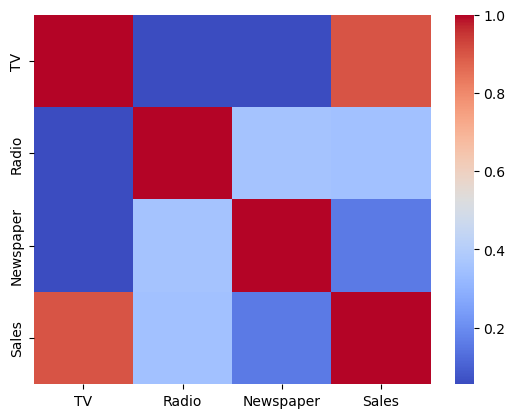

In [9]:
sns.heatmap(df_corr, cmap='coolwarm')

<Axes: >

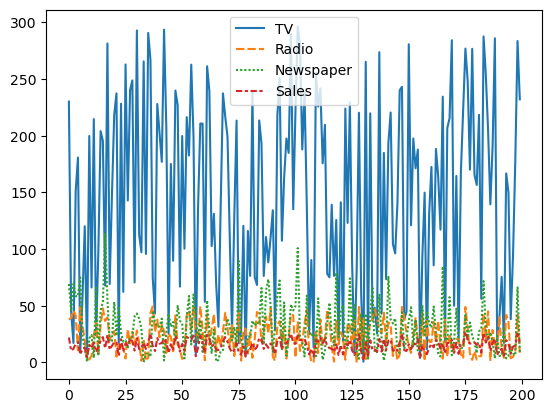

In [10]:
sns.lineplot(data=df)

In [11]:
X=df.drop('Sales', axis=1)
y=df['Sales']

In [12]:
X, y

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2      12.0
 3      16.5
 4      17.9
        ... 
 195     7.6
 196    14.0
 197    14.8
 198    25.5
 199    18.4
 Name: Sales, Length: 200, dtype: float64)

In [13]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
X.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [15]:
X[['TV', 'Radio', 'Newspaper']]= sc.fit_transform(X[['TV', 'Radio', 'Newspaper']])

In [16]:
X

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [17]:
X.describe().round()

,TV,Radio,Newspaper
count,200.0,200.0,200.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0
75%,1.0,1.0,1.0
max,2.0,2.0,4.0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)

In [20]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

In [21]:
y_train.shape, y_test.shape

((160,), (40,))

In [22]:
# model training
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [23]:
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.score(X_test, y_test) * 100

88.99073749495463

In [25]:
y_pred=reg.predict(X_test)
y_pred

array([17.15766751, 21.24486083, 14.68505508, 12.57122593,  7.23255585,
       19.36108764, 10.80999498,  8.23553822, 11.06771295, 12.18422196,
       20.55629453, 12.39507431,  9.22751562, 17.80011471, 19.15453556,
       13.58501956, 12.04096978,  8.02266494, 21.77671739, 20.95356743,
       10.51790232, 10.71399673, 11.93378503, 12.12617546, 23.18166554,
       16.84951868, 14.38944413,  9.35985275, 24.24350713, 17.19810209,
       12.52964741, 10.32187838, 19.28920727, 15.6675605 , 21.90699686,
       23.79638915, 13.22217833, 12.1627696 , 19.47317659, 15.18323971])

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
r2_score(y_test, y_pred)*100

88.99073749495463

In [29]:
mean_absolute_error(y_test, y_pred)

1.2838452345152822

In [30]:
mean_squared_error(y_test, y_pred)**0.5

1.9057963165903533

In [31]:
# input - 180.8	10.8	58.4 
# output - 17.9
new=pd.DataFrame({
    'TV':[180.8],
    'Radio':[10.8],
    'Newspaper':[58.4]
})
new

,TV,Radio,Newspaper
0,180.8,10.8,58.4


In [32]:
new[['TV', 'Radio', 'Newspaper']]=sc.transform(new[['TV', 'Radio', 'Newspaper']])

In [33]:
new

,TV,Radio,Newspaper
0,0.394182,-0.841614,1.281802


In [34]:
reg.predict(new)

array([15.54581743])